# Stroke Prediction Dataset
## Прогнозирование инсульта 

### Переменные и их типы:
1.  id: личный номер пациента - качественное номинальное 
2. gender: пол пациента ("Male", "Female" or "Other") - качественное номинальное
3. age: возраст - количественное непрерывное 
4.  hypertension: есть ли у пациента гипертония (0, если нет, 1, если есть) - качественное, номинальное, бинарное 
5. heart_disease: болезни сердца (0, если нет, 1 если есть) - качественное, номинальное, бинарное 
6. ever_married: женат/замужем ли пациент ("No" or "Yes") - качественное, номинальное, бинарное 
7. work_type: трудоустройство("children", "Govt_jov" (государственная работа), "Never_worked", "Private" or "Self-employed"(частный предприниматель)) - качественное номинальное 
8. Residence_type: место жительства ("Rural" - в деревне or "Urban" - в городе) - качественное номинальное 
9. avg_glucose_level: средний уровень глюкозы в крови - количественное непрерывное 
10. bmi: индекс массы тела - количественное непрерывное 
11. smoking_status: статус курения ("formerly smoked" - курил в прошлом, "never smoked", "smokes" or "Unknown" - нет информации) - качественное номинальное 
12. stroke: был инсульт или нет(1, если да, 0, если нет) -  качественное, номинальное, бинарное 


In [1]:
import pandas as pd 
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
# Удалим столбец с личным номером пациента, так как это информация не несет пользу для нашего проекта. 
del data['id']
data 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Для начала посмотрим, у скольких пациентов был или не был инсульт

In [4]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

##  Фильтрация 

Гипотеза 1: из 249 человек, у которых был инсульт, как минимум половина имеют либо сердечные заболевания, либо гипертонию. Гипотеза не подтвердилась. 

In [13]:
data[(data['stroke'] == 1) & ((data['heart_disease'] == 1) | (data['hypertension'] == 1))].shape

(100, 11)

Гипотеза 2: большинство данных (70%) относится к людям, живущим в городе, так как они чаще проверяют своё здоровье в виду качественного медицинского обслуживания и необходимости в диспансеризации на рабочем месте. Гипотеза не подтвердилась, данные о деревенских жителях и горожан распределены примерно поровну. 

In [12]:
data[data['Residence_type'] == 'Urban'].shape[0]

2596

Гипотеза 3: в датасете мало информации о молодых людях (до 35), так как они не предрасположены к инсульту, и они не часто проходят обследование по этому поводу. Гипотеза подтвердилась (меньше половины) 

In [13]:
data[data['age'] < 35].shape

(1845, 11)

Гипотеза 4: из 4861 людей, у которых еще не было инсульта, либо нормальный уровень сахара в крови (меньше 109), либо неожирение (индекс тела меньше 30). Гипотеза подтвердилась (4200 из 4861 человек)

In [15]:
data[(data['stroke'] == 0) 
& ((data['avg_glucose_level'] < 109) 
| (data['bmi'] < 30))].shape

(4200, 11)

Гипотеза 5: из 4681 людей, у которых еще не было инсульта, большинство не страдают от гипертонии (серьезный признак возможного инсульта), а также не работают в государственных органах (так как стресс на госработе большой, и он может спровоцировать гипертонию). Гипотеза подтвердилась (3870 человек из 4681)

In [146]:
data[(data['stroke'] == 0)
& (data['hypertension'] == 0)
& (data['work_type'] != 'Govt_job')].shape

(3870, 12)

## Сортировка

In [17]:
data.sort_values(by = 'age', ascending = False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3108,Male,82.00,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
188,Male,82.00,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
1515,Female,82.00,0,0,Yes,Govt_job,Rural,58.30,20.4,never smoked,0
1412,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,0
1951,Female,82.00,0,0,Yes,Private,Urban,99.68,22.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
3618,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3968,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4021,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


Самому взрослому пациенту, который наблюдался в больнице, было 82, при этом у него еще не было инсульта (у него нет гипертонии, но при этом довольно высокий уровень сахара в крови)

In [26]:
data.sort_values(by = ['stroke', 'age'], ascending = [False, True])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
182,Female,32.00,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
118,Female,38.00,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
133,Female,38.00,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4716,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0
4763,Male,82.00,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
4819,Female,82.00,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5062,Female,82.00,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0


Сортировка по двум переменным (возраст и был ли инсульт) показала, что самому молодому пациенту, у которого был инсульт, чуть больше года. 

In [29]:
data.sort_values(by = ['stroke', 'hypertension'], ascending = [False, True])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5088,Female,64.0,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,0
5091,Male,59.0,1,0,Yes,Private,Rural,95.05,30.9,never smoked,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


Сортировка показала, что человеку, у которого не было гипертонии, но произошел инсульт, было 67 лет. Это говорит о том, что не всегда лишь наличие гипертонии может спровоцировать инсульт. 

Интересно, посмотреть сколько всего людей, получвших инсульт, но не имеющих гипертонию (183 человека из 249). Результат шокирующий, учитывая тот факт, что гипертонию называют одним из основных симптомов инсульта.

In [19]:
data[(data['stroke'] == 1) & (data['hypertension'] == 0)].shape[0]

183

## Создание переменной 

Создадим колонку, в которой категозируем возраст. 

In [20]:
def age_range(value):
    if value < 12:
        value = 'Дети'
    elif value >= 12 and value < 18:
        value = 'Подростки' 
    elif value >= 18 and value <= 30:
        value = '18-30'
    elif value > 30 and value <= 40:
        value = '31-40'
    elif value > 40 and value <= 55:
        value = '41-55'
    elif value > 55:
        value = 'Пожилые люди'
    return value

In [21]:
data['age_range'] = data['age'].apply(age_range)

## Частотные таблицы

<AxesSubplot:>

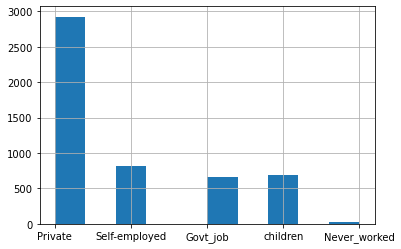

In [25]:
data['work_type'].hist()

Частотная таблица создана по переменной work_type, которая отвечает за трудоустройство пациентов. Стоит отметить, что большинство пациентов (больше 3500 человек) являются частными предпринимателями или фрилансерами (суммируем private и self-employed, так как они равнозначны). При этом в таблице с данными про инсульт также много детей (чуть больше 500), это в очередной раз относит нас к сортировке, где мы узнали возраст самого молодого пациента, получившего инсульт. 

<AxesSubplot:ylabel='gender'>

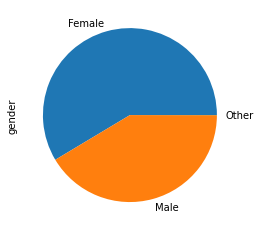

In [43]:
data['gender'].value_counts().plot(kind = 'pie')

Интересно также посмотреть на соотношение мужчин и женщин в данных. Женщин намного больше, чем мужчин, хотя мы ожидали другого соотношения в виду того, что обычно инсульту и инфаркту предрасположены больше мужчины(по крайней мере в обществе думают так), при этом людей другого пола (other) настолько мало, что на диаграмме их даже не видно. 

stroke
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: smoking_status, dtype: object

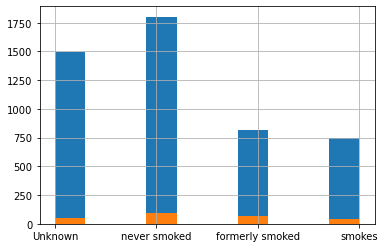

In [35]:
data.groupby('stroke')['smoking_status'].hist()

Частотная таблица рассматривает информацию о курении среди тех пациентов, у которых был или не был инсульт. На первый взгляд кажется, что среди получивших инсульт (оранжевый цвет) не так много людей, однако важно понимать, что среди всех пациентов лишь 249 получили инсульт. Если мы посмотрим на столбик "smokes" и "formerly smoke", то заметим, что значительная часть этих пациентов (примерно больше 100 человек) курит или курили. А вот те пациенты, которые не курили (синий цвет в never smoked), не получили инсульт. Курение, конечно, не первостепенный признак возможного инсульта, но он способен влиять на те процессы, которые могут его вызвать. По этой причине можно смело говорить, что одна из профилактик инсульта - избавление от никотиновой зависимости.

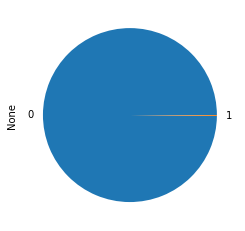

In [41]:
age_filter = data[data['age'] < 35]
heart_dis_plot = age_filter.groupby('heart_disease').size().plot(kind = 'pie')


Эта диаграмма построена по отфильтрованным данным (молодые пациенты до 35) и рассматривает информацию о сердечных заболеваниях среди этих пациентов. Диаграмма показала, что лишь очень малая часть молодых пациентов страдает от подобных заболеваний (на диаграмме под цифрой 1)

## Этап 3

## МЦТ

###  Возраст

In [44]:
data['age'].mean()

43.226614481409015

Средний возраст пациентов примерно 43 года с округлением

In [9]:
data['age'].median()

45.0

50% пациентов младше 45 лет.

In [11]:
data['age'].mode()

0    78.0
dtype: float64

Наиболее часто в данных встречается возраст 78 лет. 

### Гипертония

Так как эта переменная является бинарной, мы можем посчитать только среднее арифметическое и моду. 

In [13]:
data['hypertension'].mode()

0    0
dtype: int64

Чаще всего в данных встречаются люди, которые не страдают от гипертонии. (0 означает отсутствие гипертонии)

In [14]:
data['hypertension'].mean()

0.0974559686888454

Доля пациентов страдающих от гипертонии (то есть единиц) составляет 9%, следовательно, их меньше, чем тех, у кого гипертонии нет. 

### Средний уровень глюкозы

In [18]:
data['avg_glucose_level'].mean()

106.14767710371804

Средний уровень глюкозы среди пациентов составляет примерно 106 единиц с округлением. 

In [16]:
data['avg_glucose_level'].median()

91.88499999999999

У 50% пациентов уровень глюкозы меньше 92 единиц с округлением.

In [17]:
data['avg_glucose_level'].mode()

0    93.88
dtype: float64

Чаще всего в данных встречается показатель уровня глюкозы в 93,88 единиц. 

Построим график распределения, так как большая разница между средним арифметическим и медианой/модой. 

<AxesSubplot:>

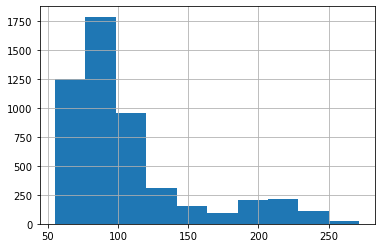

In [19]:
data['avg_glucose_level'].hist()

Гистограмма показала, что распределение уровня глюкозы несимметричное, за счёт чего и возникает такая разница. У нас много выбросов в правой стороне, они и перетягивают среднее арифметическое в большую сторону. 

### Индекс массы тела 

In [23]:
data['bmi'].mean()

28.893236911794673

Средний индекс массы тела среди пациентов составляет примерно 29 единиц с округлением.

In [21]:
data['bmi'].median()

28.1

50% пациентов имеют индекс массы тела меньше 28 единиц с округлением.

In [22]:
data['bmi'].mode()

0    28.7
dtype: float64

Чаще всего в данных встречается индекс массы тела, составляющий 28,7 единиц. 

### Болезни сердца

Переменная бинарная, считаем только моду и среднее арифметическое.

In [25]:
data['heart_disease'].mode()

0    0
dtype: int64

Чаще всего в данных встречаются люди, не имеющие болезней сердца.

In [26]:
data['heart_disease'].mean()

0.05401174168297456

Доля пациентов страдающих от сердечных болезней (то есть доля единиц) составляет 5%, следовательно, их меньше, чем тех, у кого подобных болезней нет.

### Трудоустройство

Переменная номинальная, можем посчитать только моду.

In [27]:
data['work_type'].mode()

0    Private
dtype: object

Чаще всего встречаются пациенты, которые являются индивидуальными предпринимателями. 

## Выбросы

### Ящик с усами

Рассмотрим выбросы по двум переменным: среднему уровню глюкозы (график показал, что там есть много выбросов) и индексу массы тела (все три меры центральной тенденции не сильно отличаются друг от друга)

<AxesSubplot:xlabel='bmi'>

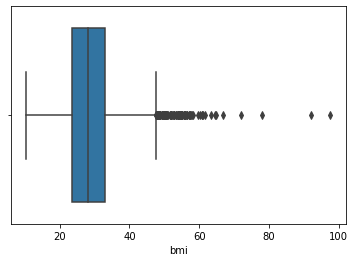

In [24]:
import seaborn as sns 
sns.boxplot(x=data['bmi'])

В переменной индекса массы тела нижняя граница значений примерно равна 10, верхняя - примерно 45-50. Выбросы есть за верхней границей, их значения варьируются от примерно 45 до 100. Если посмотреть выше на значения трех мцт, мы увидим, что среднее арифметическое было чуть больше остальных мер, это произошло как раз таки из-за выбросов в правой стороне графика. 

<AxesSubplot:xlabel='avg_glucose_level'>

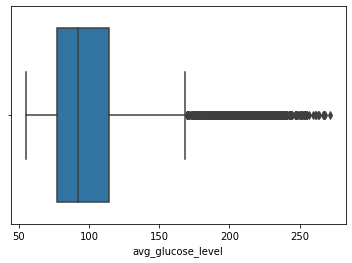

In [46]:
sns.boxplot(x=data['avg_glucose_level'])

В переменной среднего уровня глюкозы нижняя граница значений чуть больше 50, верхняя - примерно 160-170. От значений верхней границы и исходят выбросы, превышая 250 единиц. При подсчёте мцт было заметно, что среднее значительно больше остальных мцт, это произошло из-за большого количества аномальных значений, которые перетянули среднее арифметическое в правую сторону.  

### Интерквартильный размах и среднеквадратичное отклонение

Выбросы по переменной уровня глюкозы: интерквартильный размах

In [48]:
import numpy as np
q1 = np.percentile(data['avg_glucose_level'], 25)
q3 = np.percentile(data['avg_glucose_level'], 75)
iqr=q3-q1
# Нижняя граница
line1 = q1 - 1.5*iqr
# Верхняя границы
line2 = q3 + 1.5*iqr
line1, line2

(21.977500000000006, 169.35750000000002)

In [49]:
data[data['avg_glucose_level'] < line1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range


Выбросов перед нижней границей нет.

In [35]:
data[data['avg_glucose_level'] > line2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_risk
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,no risk or already had a stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,no risk or already had a stroke
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,no risk or already had a stroke
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,no risk or already had a stroke
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,no risk or already had a stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0,no risk or already had a stroke
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0,no risk or already had a stroke
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.7,Unknown,0,no risk or already had a stroke
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.3,Unknown,0,no risk or already had a stroke


In [39]:
data['avg_glucose_level'].max()

271.74

У нас огромное количество выбросов (627 строк) за верхней границей, как и показал ящик с усами, при этом с помощью функции max, мы выяснили, что значение самого большого аномального значения составляет 271.74

Выбросы по переменной уровня глюкозы: среднеквадратичное отклонение

In [40]:
mean = data['avg_glucose_level'].mean()
std = data['avg_glucose_level'].std(ddof=0)
# Нижняя граница
b_line = mean - 2.5*std
# Верхняя граница
u_line = mean + 2.5*std
print(b_line, u_line)

-7.050145538929385 219.34549974636548


Нижняя граница, высчитанная по среднеквадратичному отклонению, отрицательная. Это говорит о том, что выбросов за нижней границей нет. Хотя значения нижней границы по интерквартильному размаху и среднеквадратичному различаются, они показывают одно и то же. 

In [42]:
data[data['avg_glucose_level'] > u_line]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_risk
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,no risk or already had a stroke
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,no risk or already had a stroke
17,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1,no risk or already had a stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1,no risk or already had a stroke
22,Female,79.0,0,0,Yes,Self-employed,Urban,228.70,26.6,never smoked,1,no risk or already had a stroke
...,...,...,...,...,...,...,...,...,...,...,...,...
4921,Male,72.0,0,1,Yes,Private,Rural,238.27,NaN,smokes,0,no risk or already had a stroke
4983,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0,High risk of stroke
4986,Male,58.0,0,1,Yes,Private,Rural,225.35,26.5,smokes,0,no risk or already had a stroke
5034,Female,79.0,0,0,No,Private,Urban,253.86,28.8,formerly smoked,0,no risk or already had a stroke


По среднеквадратичному отклонению выбросов стало меньше (всего 221 строка), так как нижняя граница стала больше, не 169, а 219. Это основное различие между показателями интерквартильного размаха и среднеквадратичного отклонения: происходит смещение границ в ту или иную сторону, и выбросов становится больше или меньше. 

## Удаление выбросов 

Так как по интеквартильному размаху выбросов было достаточно много, посмотрим, как изменятся мцт, если мы удалим выбросы. 

Создадим новый датасет, в котором строки с выбросами отсутствуют. 

In [51]:
new_data = data[(data['avg_glucose_level'] < line2)&(data['avg_glucose_level'] > line1)]
new_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Пожилые люди
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Пожилые люди
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Пожилые люди
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,Пожилые люди
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Пожилые люди
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,Пожилые люди
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Пожилые люди
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,31-40
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,41-55


In [52]:
new_data['avg_glucose_level'].mean()

91.4350769573943

In [53]:
new_data['avg_glucose_level'].median()

87.96

In [55]:
new_data['avg_glucose_level'].mode()

0    93.88
dtype: float64

<AxesSubplot:>

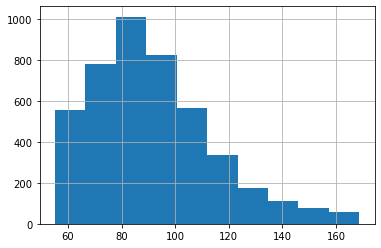

In [53]:
new_data['avg_glucose_level'].hist()

Удаление выбросов привело к тому, что значения мцт теперь не сильно отличаются друг от друга (медиана чуть меньше остальных мцт). На гистограмме мы видим, что распределение не слишком симметричное из-за выбивающихся значений от 120 до примерно 165, однако выбросами они не являются. 

## Пропущенные значения

In [57]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_range              0
dtype: int64

Пропущенные значения есть в переменной индекса массы тела (201 пропущенное значение). 

## Этап 4

Для начала заменим в нашем датасете пропущенные значения в переменной индекса массы тела на медиану. 

In [61]:
data['bmi'].fillna(data['bmi'].median(), inplace = True)

Найдем нижние и верхние границы переменных: уровня глюкозы в крови, индекса массы тела и возраста. Корреляции именно этих переменных мы будем находить дальше, так как это единственные непрерывные переменные в наших данных. 

In [67]:
q1 = np.percentile(data['avg_glucose_level'], 25)
q3 = np.percentile(data['avg_glucose_level'], 75)
iqr=q3-q1
# Нижняя граница
line1 = q1 - 1.5*iqr
# Верхняя границы
line2 = q3 + 1.5*iqr
line1, line2

(21.977500000000006, 169.35750000000002)

In [65]:
# Возраст
q1_a = np.percentile(data['age'], 25)
q3_a = np.percentile(data['age'], 75)
iqr_a=q3_a-q1_a
# Нижняя граница
line1_a = q1_a - 1.5*iqr_a
# Верхняя границы
line2_a = q3_a + 1.5*iqr_a

In [66]:
# Индекс массы тела
q1_b = np.percentile(data['bmi'], 25)
q3_b = np.percentile(data['bmi'], 75)
iqr_b=q3_b-q1_b
# Нижняя граница
line1_b = q1_b - 1.5*iqr_b
# Верхняя границы
line2_b = q3_b + 1.5*iqr_b

Создадим новый датасет, в котором не будет выбросов по выбранным переменным. 

In [68]:
data_new = data[((data['age'] < line2_a)&(data['age'] > line1_a))
     &((data['avg_glucose_level'] < line2)&(data['avg_glucose_level'] > line1))
     &((data['bmi'] < line2_b)&(data['bmi'] > line1_b))]

### Корреляционная матрица 

In [71]:
data_new[['avg_glucose_level', 'bmi', 'age']].corr()

,avg_glucose_level,bmi,age
avg_glucose_level,1.000000,0.002513,-0.024587
bmi,0.002513,1.000000,0.375375
age,-0.024587,0.375375,1.000000


### Интерпретация матрицы и графики

Рассматривая переменные индекса массы тела и уровня глюкозы, мы предположили, что чем больше уровень глюкозы, тем больше и индекс массы тела, так как при сахарном диабете нарушается углеводный обмен и у человека появляется лишний вес. Однако корреляция показала иное. **Коэффициент корреляции между этими переменными равен примерно 0.003**, что свидетельствует о крайне слабой связи между переменными. Тем не менее коэффициент положительный, значит зависимость прямая, а не обратная (идет слева направо на графике). 

Рассмотрим график рассеяния этих переменных

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

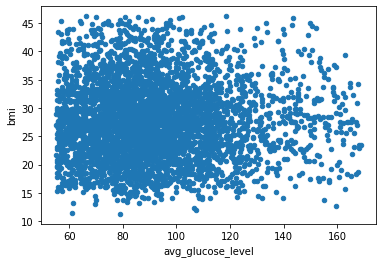

In [143]:
data_new.plot('avg_glucose_level', 'bmi', kind='scatter')

Действительно, связь между переменными слабая, так как значения распределены хаотично и не выстраиваются в линию. 

Крайне слабая связь наблюдается и между переменными уровня глюкозы в крови и возраста. Коэффициент равен -0.002. К тому же коэффициент отрицательный, получается, что зависимость обратная: можно предположить, что, чем больше возраст, тем меньше уровень глюкозы. Это очень интересный результат: возможно, среди наших пациентов взрослого возраста мало людей, страдающих от сахарного диабета, а среди младшего возраста - больше. Изначально мы считали, что ситуация будет обратной. 

Рассмотрим график рассеяния этих переменных

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

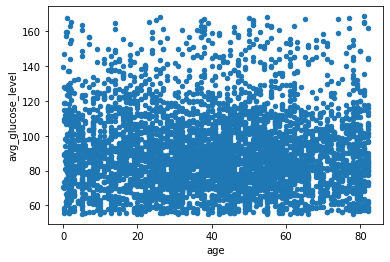

In [145]:
data_new.plot('age', 'avg_glucose_level', kind='scatter')

Действительно, связь между переменными слабая, так как значения распределены хаотично по всему графику (причем в нижней части распределено большая часть значений) и не выстраиваются в линию.

Получше связь между переменными индекса массы тела и возраста. Коэфициент корреляции равен примерно 0.4, это умеренная связь, а за счёт того, что коэффициент положительный, мы можем предположить, что зависимость прямая: чем старше человек, тем больше индекс массы тела. Это подтверждают и медицинские исследования, по результам которых с возрастом люди могут набирать вес из-за жировой ткани и утраты мышечной. 

Рассмотрим график рассеяния этих переменных

<AxesSubplot:xlabel='age', ylabel='bmi'>

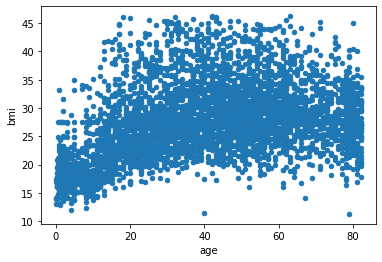

In [146]:
data_new.plot('age', 'bmi', kind='scatter')

Связь умеренная, и это видно на графике. Значения всё так же хаотично распределены, но мы можем выделить некое подобие линейного выстраивания, а также видим положительное направление (слева направо) и выбросы (внизу графика). 